In [1]:
from pyspark import SparkConf, SparkContext
# 스파크 환경 설정 객체 생성
conf = SparkConf().setMaster("local").setAppName("241206_01_RDD")
spark = SparkContext(conf=conf).getOrCreate()

24/12/06 11:40:38 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
import os
directory = os.path.join(os.getcwd(), "data")  # 현재 디렉토리의 data 폴더
filename  = "Book"
file_path = os.path.join(directory, filename)
# Spark RDD 생성
lines = spark.textFile("file:///" + file_path.replace("\\", "/"))

In [4]:
lines.take(3)

['Self-Employment: Building an Internet Business of One',
 'Achieving Financial and Personal Freedom through a Lifestyle Technology Business',
 'By Frank Kane']

In [5]:
map_words = lines.map(lambda x : x.split())
map_words.take(5)

[['Self-Employment:', 'Building', 'an', 'Internet', 'Business', 'of', 'One'],
 ['Achieving',
  'Financial',
  'and',
  'Personal',
  'Freedom',
  'through',
  'a',
  'Lifestyle',
  'Technology',
  'Business'],
 ['By', 'Frank', 'Kane'],
 [],
 []]

In [6]:
# 단어 수 세기

words = lines.flatMap(lambda x:x.split())
words.take(5)

['Self-Employment:', 'Building', 'an', 'Internet', 'Business']

In [7]:
wordCounts = words.countByValue()
wordCounts

defaultdict(int,
            {'Self-Employment:': 1,
             'Building': 5,
             'an': 172,
             'Internet': 13,
             'Business': 19,
             'of': 941,
             'One': 12,
             'Achieving': 1,
             'Financial': 3,
             'and': 901,
             'Personal': 3,
             'Freedom': 7,
             'through': 55,
             'a': 1148,
             'Lifestyle': 5,
             'Technology': 2,
             'By': 9,
             'Frank': 10,
             'Kane': 7,
             'Copyright': 1,
             '�': 174,
             '2015': 3,
             'Kane.': 1,
             'All': 13,
             'rights': 3,
             'reserved': 2,
             'worldwide.': 2,
             'CONTENTS': 1,
             'Disclaimer': 1,
             'Preface': 1,
             'Part': 2,
             'I:': 2,
             'Making': 5,
             'the': 1176,
             'Big': 1,
             'Decision': 1,
             'Overcoming'

In [9]:
!pip install wordcloud
from wordcloud import WordCloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 163.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 171.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 154.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 107.2 MB/s eta 0:00:00


In [10]:
wordCounts.items()

dict_items([('Self-Employment:', 1), ('Building', 5), ('an', 172), ('Internet', 13), ('Business', 19), ('of', 941), ('One', 12), ('Achieving', 1), ('Financial', 3), ('and', 901), ('Personal', 3), ('Freedom', 7), ('through', 55), ('a', 1148), ('Lifestyle', 5), ('Technology', 2), ('By', 9), ('Frank', 10), ('Kane', 7), ('Copyright', 1), ('�', 174), ('2015', 3), ('Kane.', 1), ('All', 13), ('rights', 3), ('reserved', 2), ('worldwide.', 2), ('CONTENTS', 1), ('Disclaimer', 1), ('Preface', 1), ('Part', 2), ('I:', 2), ('Making', 5), ('the', 1176), ('Big', 1), ('Decision', 1), ('Overcoming', 1), ('Inertia', 1), ('Fear', 1), ('Failure', 1), ('Career', 1), ('Indoctrination', 2), ('The', 88), ('Carrot', 1), ('on', 399), ('Stick', 2), ('Ego', 1), ('Protection', 1), ('Your', 62), ('Employer', 2), ('as', 297), ('Security', 2), ('Blanket', 1), ('Why', 3), ('it�s', 28), ('Worth', 1), ('it', 311), ('Unlimited', 2), ('Growth', 4), ('Potential', 1), ('Investing', 3), ('in', 552), ('Yourself,', 1), ('Not', 

In [11]:
# 텍스트 전처리
stop_words = { 'a' , 'an' }

In [19]:
filtered_word_counts = { k:v for k,v in wordCounts.items() if k.lower() not in stop_words and len(k)>3 }

In [20]:
filtered_word_counts

{'Self-Employment:': 1,
 'Building': 5,
 'Internet': 13,
 'Business': 19,
 'Achieving': 1,
 'Financial': 3,
 'Personal': 3,
 'Freedom': 7,
 'through': 55,
 'Lifestyle': 5,
 'Technology': 2,
 'Frank': 10,
 'Kane': 7,
 'Copyright': 1,
 '2015': 3,
 'Kane.': 1,
 'rights': 3,
 'reserved': 2,
 'worldwide.': 2,
 'CONTENTS': 1,
 'Disclaimer': 1,
 'Preface': 1,
 'Part': 2,
 'Making': 5,
 'Decision': 1,
 'Overcoming': 1,
 'Inertia': 1,
 'Fear': 1,
 'Failure': 1,
 'Career': 1,
 'Indoctrination': 2,
 'Carrot': 1,
 'Stick': 2,
 'Protection': 1,
 'Your': 62,
 'Employer': 2,
 'Security': 2,
 'Blanket': 1,
 'it�s': 28,
 'Worth': 1,
 'Unlimited': 2,
 'Growth': 4,
 'Potential': 1,
 'Investing': 3,
 'Yourself,': 1,
 'Someone': 2,
 'Else': 1,
 'Dependencies': 1,
 'Commute': 1,
 'Live': 3,
 'Where': 2,
 'Want': 5,
 'Work': 4,
 'When': 31,
 'Self-Employment': 1,
 'You?': 1,
 'Flowchart:': 1,
 'Should': 3,
 'Even': 35,
 'Consider': 5,
 'Self-Employment?': 2,
 'Having': 2,
 'Safety': 2,
 'Planning': 3,
 'Heal

In [14]:
import matplotlib.pyplot as plt

In [18]:
# 카운트 상위 20개
top_words = sorted(filtered_word_counts.items(), key=lambda x:x[1], reverse=True)[:20]
word_list = [word for word, count in top_words]
word_counts_list = [count for word, count in top_words]

<BarContainer object of 20 artists>

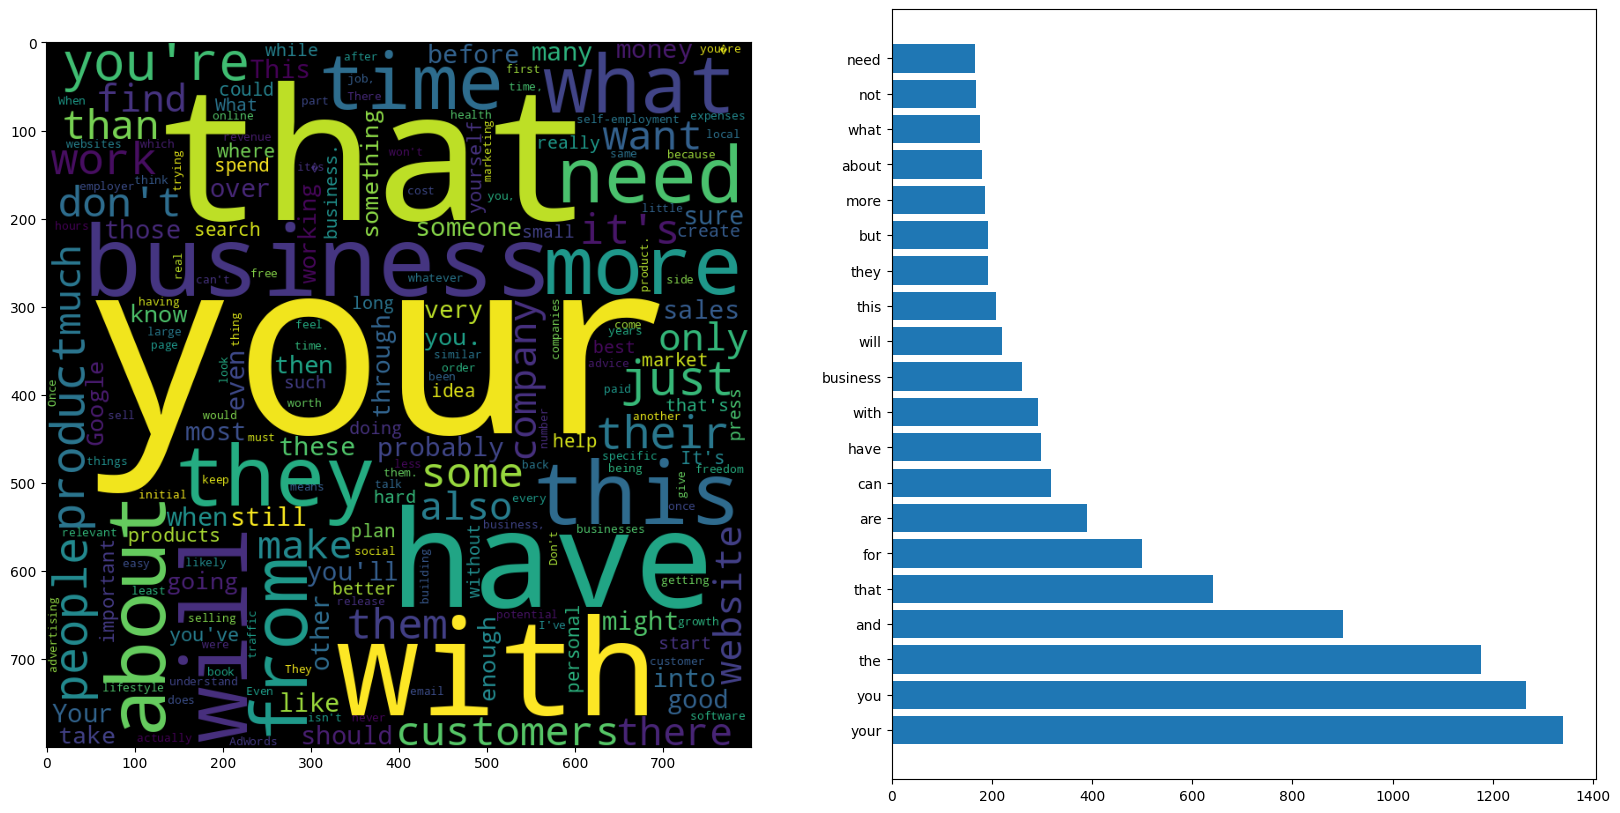

In [22]:
# 시각화
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
wc = WordCloud(width=800, height=800).generate_from_frequencies(filtered_word_counts)
plt.imshow(wc)

plt.subplot(1,2,2)
plt.barh(word_list, word_counts_list)

In [23]:
spark.stop()